In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
yoga_test = pd.read_csv('./yogaTEST', header=None)
yoga_train = pd.read_csv('./yogaTRAIN', header=None)

## EDA

In [3]:
yoga_train.head()

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,1,-0.074815,-0.099987,-0.12415,-0.14727,-0.16934,-0.19031,-0.21018,-0.22890,-0.24646,...,-0.24712,-0.22248,-0.21588,-0.19327,-0.14695,-0.10947,-0.095929,-0.080018,-0.061776,-0.061776
1,1,0.967690,0.955940,0.94516,0.87896,0.86663,0.85866,0.85172,0.84579,0.84090,...,0.75879,0.81326,0.86449,0.89717,0.93158,0.96224,0.947720,0.983310,0.966560,0.966560
2,2,0.960920,0.928330,0.89653,0.86557,0.83554,0.80644,0.77847,0.75142,0.72531,...,1.25130,1.21390,1.21600,1.22380,1.20910,1.16900,1.129700,1.091000,1.053100,1.029800
3,2,1.908200,1.870500,1.83370,1.79780,1.76290,1.72910,1.69640,1.63020,1.55850,...,1.80560,1.86160,1.88460,1.92150,1.95580,1.96770,1.982100,1.983100,1.953000,1.962700
4,1,2.016700,1.986400,1.95650,1.92720,1.89880,1.87080,1.84360,1.81720,1.79120,...,1.77030,1.82520,1.88040,1.90540,1.93240,1.98900,2.021300,2.035500,2.000300,2.000300


In [4]:
yoga_test.head()

,0,1,2,3,4,5,6,7,8,9,...,417,418,419,420,421,422,423,424,425,426
0,1,0.71303,0.71253,0.71299,0.66199,0.65729,0.61312,0.60570,0.61113,0.57732,...,0.37777,0.43390,0.49006,0.54338,0.59004,0.62622,0.61866,0.61918,0.66582,0.66582
1,2,1.60470,1.59760,1.59090,1.58460,1.57870,1.57320,1.56830,1.56380,1.55970,...,1.14940,1.18890,1.22850,1.26810,1.30780,1.34740,1.38670,1.41880,1.45420,1.47910
2,1,2.22690,2.23330,2.24030,2.24800,2.25640,2.21280,2.16650,2.11550,2.05930,...,1.54710,1.60430,1.66140,1.71850,1.77560,1.83280,1.88990,1.94710,2.00420,2.06390
3,2,1.59230,1.59920,1.60690,1.61540,1.61970,1.58100,1.58770,1.55080,1.55230,...,0.99759,1.05450,1.11140,1.16830,1.22530,1.28340,1.34060,1.39280,1.40210,1.40440
4,1,0.86213,0.85656,0.85257,0.85015,0.84931,0.85004,0.85236,0.85625,0.86170,...,0.84290,0.81818,0.80008,0.84231,0.82237,0.80391,0.78695,0.77152,0.75898,0.75898


In [5]:
y_train = yoga_train.iloc[:, 0].values
X_train = yoga_train.iloc[:, 1:].values

y_test = yoga_test.iloc[:, 0].values
X_test = yoga_test.iloc[:, 1:].values

In [6]:
classes = np.unique(y_train)
n_classes = len(classes)
n_time_steps = X_train.shape[1]

print(f"\nИнформация о датасете yoga:")
print(f"Количество классов: {n_classes}")
print(f"Классы: {classes}")
print(f"Количество временных меток: {n_time_steps}")


Информация о датасете yoga:
Количество классов: 2
Классы: [1 2]
Количество временных меток: 426


In [7]:
train_class_dist = pd.Series(y_train).value_counts().sort_index()
test_class_dist = pd.Series(y_test).value_counts().sort_index()

In [8]:
# Распределение классов в тренировочной выборке
for cls, count in train_class_dist.items():
    print(f"Класс {cls}: {count} значений")

Класс 1: 137 значений
Класс 2: 163 значений


In [9]:
# Распределение классов в тестовой выборке
for cls, count in test_class_dist.items():
    print(f"Класс {cls}: {count} значений")

Класс 1: 1393 значений
Класс 2: 1607 значений


In [10]:
# Статистика по данным
print(f"Avg: {X_train.mean():.4f}")
print(f"Std: {X_train.std():.4f}")
print(f"Min: {X_train.min():.4f}")
print(f"Max: {X_train.max():.4f}")


Avg: 0.0000
Std: 0.9988
Min: -2.4193
Max: 2.4050


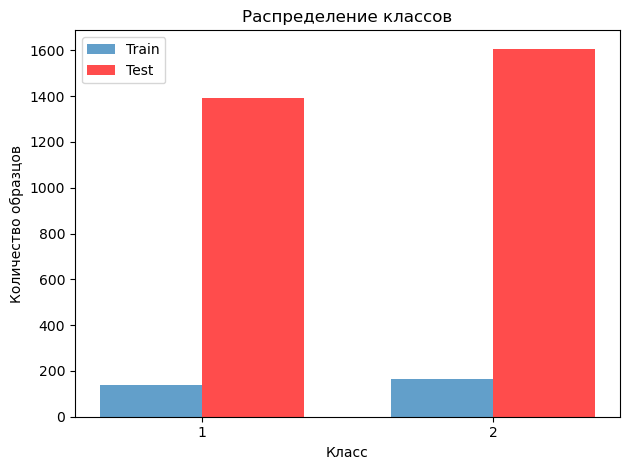

In [11]:
indices = np.arange(len(train_class_dist))

# Ширина столбцов
width = 0.35

# Рисуем столбцы с смещением
plt.bar(indices - width/2, train_class_dist.values, width=width, alpha=0.7, label='Train')
plt.bar(indices + width/2, test_class_dist.values, width=width,color='red', alpha=0.7, label='Test')

plt.title('Распределение классов')
plt.xlabel('Класс')
plt.ylabel('Количество образцов')
plt.xticks(indices, train_class_dist.index)
plt.legend()
plt.tight_layout()


Text(0, 0.5, 'Значение')

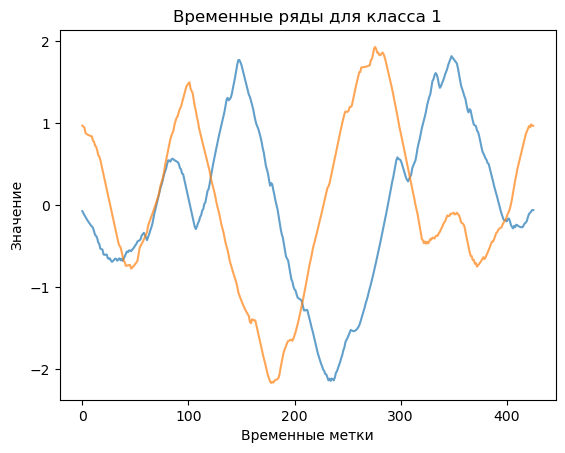

In [12]:
cls_indices = np.where(y_train == 1)[0][:2]
for idx in cls_indices:
    plt.plot(X_train[idx], alpha=0.7)

plt.title('Временные ряды для класса 1')
plt.xlabel('Временные метки')
plt.ylabel('Значение')

Text(0, 0.5, 'Значение')

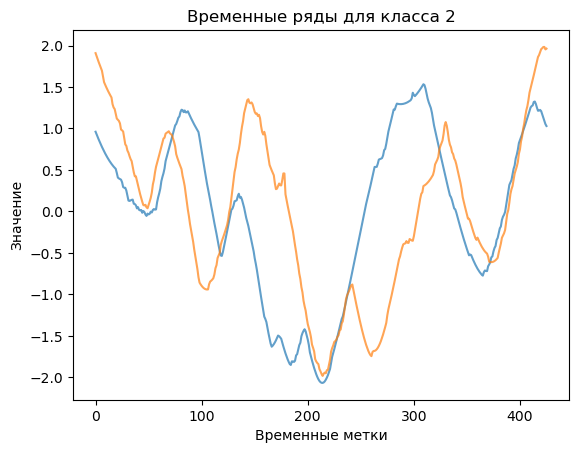

In [13]:
cls_indices = np.where(y_train == 2)[0][:2]
for idx in cls_indices:
    plt.plot(X_train[idx], alpha=0.7)

plt.title('Временные ряды для класса 2')
plt.xlabel('Временные метки')
plt.ylabel('Значение')

Text(0, 0.5, 'Частота')

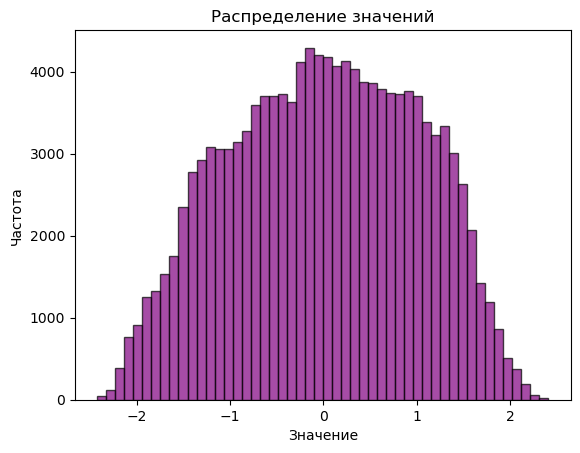

In [14]:
# Гистограмма значений
all_values = X_train.flatten()
plt.hist(all_values, bins=50, alpha=0.7, color='purple', edgecolor='black')
plt.title('Распределение значений')
plt.xlabel('Значение')
plt.ylabel('Частота')


Text(0, 0.5, 'Значение')

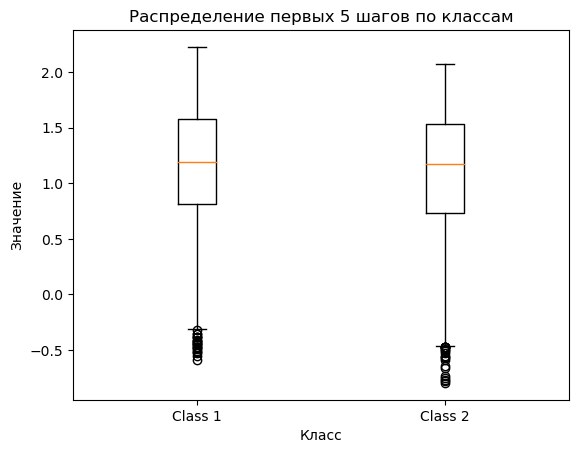

In [15]:
boxplot_data = []
labels = []
for cls in classes:
    cls_data = X_train[y_train == cls][:, :5]
    boxplot_data.append(cls_data.flatten())
    labels.append(f'Class {cls}')
    
plt.boxplot(boxplot_data, labels=labels)
plt.title('Распределение первых 5 шагов по классам')
plt.xlabel('Класс')
plt.ylabel('Значение')

In [16]:
print(f"Пропущенные значения в тренировочных данных: {np.isnan(X_train).sum()}")
print(f"Пропущенные значения в тестовых данных: {np.isnan(X_test).sum()}")


Пропущенные значения в тренировочных данных: 0
Пропущенные значения в тестовых данных: 0


In [17]:
# Нормализуем каждый временной ряд отдельно
def normalize_series(data):
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(data.T).T
    return normalized_data

X_train_norm = normalize_series(X_train)
X_test_norm = normalize_series(X_test)


print(f"Тренировочные данные: min={X_train_norm.min():.4f}, max={X_train_norm.max():.4f}")
print(f"Тестовые данные: min={X_test_norm.min():.4f}, max={X_test_norm.max():.4f}")

Тренировочные данные: min=-2.4221, max=2.4078
Тестовые данные: min=-2.8571, max=2.4414


In [18]:
def train_and_evaluate_models(X_train, X_test, y_train, y_test):

    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'SVM': SVC(kernel='rbf', random_state=42, probability=True),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, multi_class='ovr')
    }
    
    results = {}
    
    for name, model in models.items():
        print(f"\n{name}")
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test) if hasattr(model, 'predict_proba') else None

        accuracy = accuracy_score(y_test, y_pred)
    
        results[name] = {
            'accuracy': accuracy,
            'model': model,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba
        }
        
        print(f"Accuracy: {accuracy}")
         
    return results


In [19]:
results = train_and_evaluate_models(X_train_norm, X_test_norm, y_train, y_test)



Random Forest
Accuracy: 0.8103333333333333

SVM
Accuracy: 0.6723333333333333

KNN
Accuracy: 0.7563333333333333

Logistic Regression
Accuracy: 0.6583333333333333


In [20]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]

In [21]:
print(classification_report(y_test, best_model['y_pred'], target_names=[str(c) for c in classes]))

              precision    recall  f1-score   support

           1       0.82      0.76      0.79      1393
           2       0.81      0.85      0.83      1607

    accuracy                           0.81      3000
   macro avg       0.81      0.81      0.81      3000
weighted avg       0.81      0.81      0.81      3000



In [22]:
cm = confusion_matrix(y_test, best_model['y_pred'])
cm

array([[1065,  328],
       [ 241, 1366]])

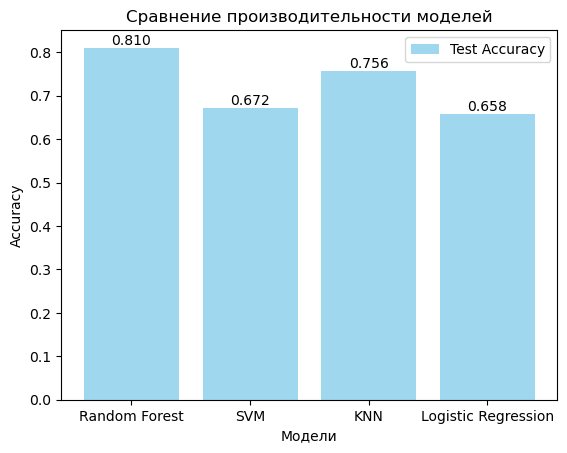

In [23]:
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

x = np.arange(len(model_names))
bars = plt.bar(x, accuracies,label='Test Accuracy', color='skyblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
        f'{height:.3f}', ha='center', va='bottom')

plt.xlabel('Модели')
plt.ylabel('Accuracy')
plt.title('Сравнение производительности моделей')
plt.xticks(x, labels=model_names)
plt.legend()

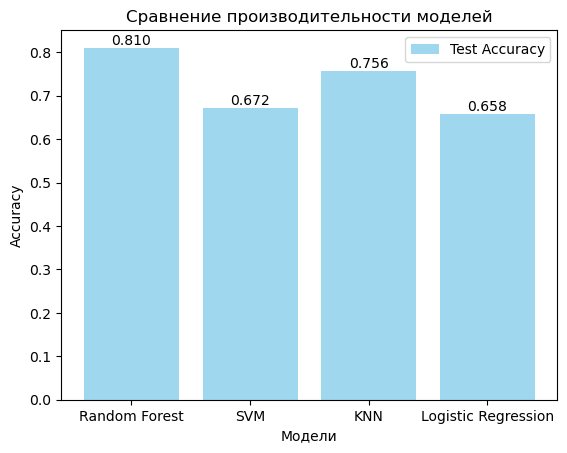

In [24]:
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

x = np.arange(len(model_names))
bars = plt.bar(x, accuracies,label='Test Accuracy', color='skyblue', alpha=0.8)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
        f'{height:.3f}', ha='center', va='bottom')

plt.xlabel('Модели')
plt.ylabel('Accuracy')
plt.title('Сравнение производительности моделей')
plt.xticks(x, labels=model_names)
plt.legend()